In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
cd /content/drive/My Drive/URL/New Test Data

/content/drive/My Drive/URL/New Test Data


In [4]:
import io
df = pd.read_csv('new_test_data.csv')

In [5]:
df1=pd.read_csv('additional_data50000.csv')
df2=pd.read_csv('additional_data11000.csv')

In [6]:
print(df.shape)
print(df1.shape)
print(df2.shape)

(1000, 57)
(50000, 57)
(11430, 57)


In [7]:
print(df['label'].value_counts())
print(df1['label'].value_counts())
print(df2['label'].value_counts())

label
1    500
0    500
Name: count, dtype: int64
label
0    50000
Name: count, dtype: int64
label
1    5715
0    5715
Name: count, dtype: int64


In [10]:
merged_df = pd.concat([df, df1, df2], ignore_index=True)
print(merged_df.shape)
print(merged_df['label'].value_counts())

(62430, 57)
label
0    56215
1     6215
Name: count, dtype: int64


In [11]:
merged_df.head()

,URL,label,HasSocialNet,HasCopyrightInfo,HasDescription,IsHTTPS,DomainTitleMatchScore,HasSubmitButton,IsResponsive,URLTitleMatchScore,...,Has_secure,HasObfuscation,NoOfPopup,NoOfURLRedirect,Has_verify,LargestLineLength,NoOfAmpersandInURL,Has_password,NoOfSubDomain,UppercaseCount
0,http://searchtelecom.techtarget.com/definition...,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,3
1,https://www.oberoirealty.com/,1,0,0,0,1,41,0,0,41,...,0,0,0,0,0,180,0,0,1,0
2,http://www.gnu.org/s/emacs/manual/html_node/el...,1,0,0,1,0,48,0,1,48,...,0,0,0,0,0,373,0,0,1,2
3,http://www.tsmplug.com/tennis/australian-open-...,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,http://www.e-lead.com/elead/index.php?lang=en,1,0,1,0,0,13,0,1,13,...,0,0,0,0,0,4070,0,0,1,0


In [12]:
merged_df.isnull().sum()

,0
URL,0
label,0
HasSocialNet,0
HasCopyrightInfo,0
HasDescription,0
IsHTTPS,0
DomainTitleMatchScore,0
HasSubmitButton,0
IsResponsive,0
URLTitleMatchScore,0


In [13]:
merged_df.dtypes

,0
URL,object
label,int64
HasSocialNet,int64
HasCopyrightInfo,int64
HasDescription,int64
IsHTTPS,int64
DomainTitleMatchScore,int64
HasSubmitButton,int64
IsResponsive,int64
URLTitleMatchScore,int64


In [14]:
merged_df.shape

(62430, 57)

In [15]:
merged_df['label'].value_counts()

,count
label,
0,56215
1,6215


In [16]:
# List of features to keep
features_to_keep = [
    'HasSocialNet',
    'HasCopyrightInfo',
    'HasDescription',
    'IsHTTPS',
    'DomainTitleMatchScore',
    'HasSubmitButton',
    'IsResponsive',
    'URLTitleMatchScore',
    'SpacialCharRatioInURL',
    'HasHiddenFields',
    'HasFavicon',
    'URLCharProb',
    'HasTitle',
    'DegitRatioInURL',
    'URL_Entropy',
    'Robots',
    'NoOfJS',
    'LetterRatioInURL',
    'Pay',
    'NoOfOtherSpecialCharsInURL',
    'NoOfSelfRef',
    'DomainLength',
    'NoOfImage',
    'LineOfCode',
    'NoOfExternalRef',
    'NoOfLettersInURL',
    'URLLength',
    'NoOfiFrame',
    'Bank',
    'NoOfDegitsInURL',
    'NoOfQMarkInURL',
    'TitleLength',
    'HasExternalFormSubmit',
    'Has_login',
    'HasPasswordField',
    'DotCount',
    'NoOfEmptyRef',
    'Crypto',
    'TLDLength',
    'NoOfEqualsInURL',
    'NoOfSelfRedirect',
    'Has_account',
    'NoOfCSS',
    'Has_update',
    'IsDomainIP',
    'Has_secure',
    'HasObfuscation',
    'NoOfPopup',
    'NoOfURLRedirect',
    'Has_verify',
    'LargestLineLength',
    'NoOfAmpersandInURL',
    'Has_password',
    'NoOfSubDomain',
    'UppercaseCount',
    'label'
]

# Creating a new DataFrame with only the selected features
df_cleaned = merged_df[features_to_keep]

# Display the cleaned DataFrame
print(df_cleaned.head())


   HasSocialNet  HasCopyrightInfo  HasDescription  IsHTTPS  \
0             0                 0               0        0   
1             0                 0               0        1   
2             0                 0               1        0   
3             0                 0               0        0   
4             0                 1               0        0   

   DomainTitleMatchScore  HasSubmitButton  IsResponsive  URLTitleMatchScore  \
0                      0                0             0                   0   
1                     41                0             0                  41   
2                     48                0             1                  48   
3                      0                0             0                   0   
4                     13                0             1                  13   

   SpacialCharRatioInURL  HasHiddenFields  ...  HasObfuscation  NoOfPopup  \
0               0.000000                0  ...               0          0  

In [17]:
df_cleaned.shape

(62430, 56)

In [18]:
df_2=pd.read_csv('cleaned_data.csv')

In [19]:
df_2.shape

(235795, 56)

In [20]:
# Comparing data types of df_2 and df_cleaned
print("Data types of df_2:")
print(df_2.dtypes)
print("\nData types of df_cleaned:")
print(df_cleaned.dtypes)

# Find columns with different data types
different_dtypes = []
for col in df_cleaned.columns:
  if col in df_2.columns and df_cleaned[col].dtype != df_2[col].dtype:
    different_dtypes.append(col)

if different_dtypes:
    print("\nColumns with different data types:")
    for col in different_dtypes:
        print(f"- {col}: df_cleaned ({df_cleaned[col].dtype}) vs df_2 ({df_2[col].dtype})")
else:
    print("\nNo columns have different data types.")

Data types of df_2:
HasSocialNet                    int64
HasCopyrightInfo                int64
HasDescription                  int64
IsHTTPS                         int64
DomainTitleMatchScore         float64
HasSubmitButton                 int64
IsResponsive                    int64
URLTitleMatchScore            float64
SpacialCharRatioInURL         float64
HasHiddenFields                 int64
HasFavicon                      int64
URLCharProb                   float64
HasTitle                        int64
DegitRatioInURL               float64
URL_Entropy                   float64
Robots                          int64
NoOfJS                          int64
LetterRatioInURL              float64
Pay                             int64
NoOfOtherSpecialCharsInURL      int64
NoOfSelfRef                     int64
DomainLength                    int64
NoOfImage                       int64
LineOfCode                      int64
NoOfExternalRef                 int64
NoOfLettersInURL              

In [21]:
#change the datatype of DomainTitleMatchScore from (int64) to (float64)
# URLTitleMatchScore: int64) to (float64) in df_cleaned

df_cleaned['DomainTitleMatchScore'] = df_cleaned['DomainTitleMatchScore'].astype('float64')
df_cleaned['URLTitleMatchScore'] = df_cleaned['URLTitleMatchScore'].astype('float64')

<ipython-input-21-d2d494218ba1>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['DomainTitleMatchScore'] = df_cleaned['DomainTitleMatchScore'].astype('float64')
<ipython-input-21-d2d494218ba1>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['URLTitleMatchScore'] = df_cleaned['URLTitleMatchScore'].astype('float64')


In [22]:
df_cleaned.shape

(62430, 56)

In [23]:
df_2.shape

(235795, 56)

In [24]:
# Creating a new DataFrame with only the selected features
df2_cleaned = df_2[features_to_keep]

# Display the cleaned DataFrame
print(df2_cleaned.head())


   HasSocialNet  HasCopyrightInfo  HasDescription  IsHTTPS  \
0             0                 1               0        1   
1             1                 1               0        1   
2             0                 1               1        1   
3             1                 1               0        1   
4             1                 1               1        1   

   DomainTitleMatchScore  HasSubmitButton  IsResponsive  URLTitleMatchScore  \
0               0.000000                1             1            0.000000   
1              55.555556                1             0           55.555556   
2              46.666667                1             1           46.666667   
3               0.000000                1             1            0.000000   
4             100.000000                1             1          100.000000   

   SpacialCharRatioInURL  HasHiddenFields  ...  HasObfuscation  NoOfPopup  \
0                  0.032                1  ...               0          0  

In [25]:
# Merge df_cleaned and df2_cleaned
merged_df_final = pd.concat([df_cleaned, df2_cleaned], ignore_index=True)

# Display the shape of the merged dataframe
print(merged_df_final.shape)

# Display the value counts of the 'label' column in the merged dataframe
print(merged_df_final['label'].value_counts())

(298225, 56)
label
0    157160
1    141065
Name: count, dtype: int64


In [26]:
merged_df_final.to_csv('merged_df_final.csv', index=False)

Random Forest Classifier

Final Accuracy: 0.9947355184843658
              precision    recall  f1-score   support

           0       0.99      1.00      1.00     31556
           1       1.00      0.99      0.99     28089

    accuracy                           0.99     59645
   macro avg       0.99      0.99      0.99     59645
weighted avg       0.99      0.99      0.99     59645



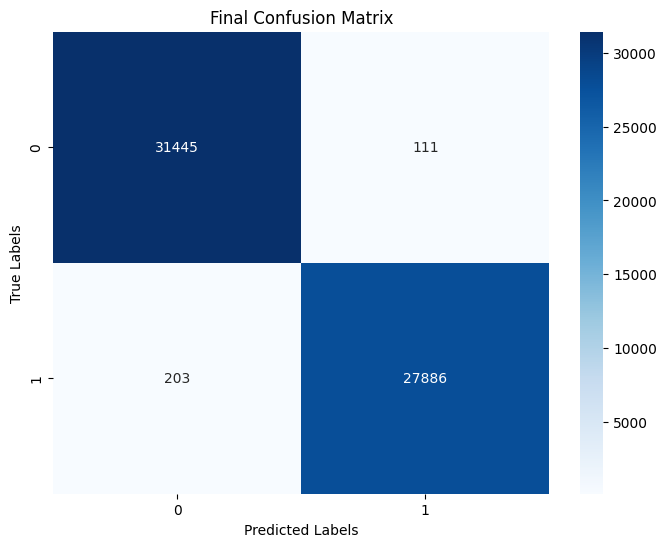

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

X_final = merged_df_final.drop('label', axis=1)
y_final = merged_df_final['label']

# Split data into training and testing sets
X_train_final, X_test_final, y_train_final, y_test_final = train_test_split(X_final, y_final, test_size=0.2, random_state=42)

# Initialize and train a Random Forest classifier on the merged dataset
rf_classifier_final = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier_final.fit(X_train_final, y_train_final)

# Make predictions on the test set
y_pred_final = rf_classifier_final.predict(X_test_final)

# Evaluate the model
accuracy_final = accuracy_score(y_test_final, y_pred_final)
print(f"Final Accuracy: {accuracy_final}")

print(classification_report(y_test_final, y_pred_final))

# Create and plot the confusion matrix
cm_final = confusion_matrix(y_test_final, y_pred_final)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_final, annot=True, fmt='d', cmap='Blues',
            xticklabels=np.unique(y_test_final), yticklabels=np.unique(y_test_final))
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Final Confusion Matrix')
plt.show()

XGB Classifier

XGBoost Accuracy: 0.9942996060021796
              precision    recall  f1-score   support

           0       0.99      1.00      0.99     31556
           1       1.00      0.99      0.99     28089

    accuracy                           0.99     59645
   macro avg       0.99      0.99      0.99     59645
weighted avg       0.99      0.99      0.99     59645



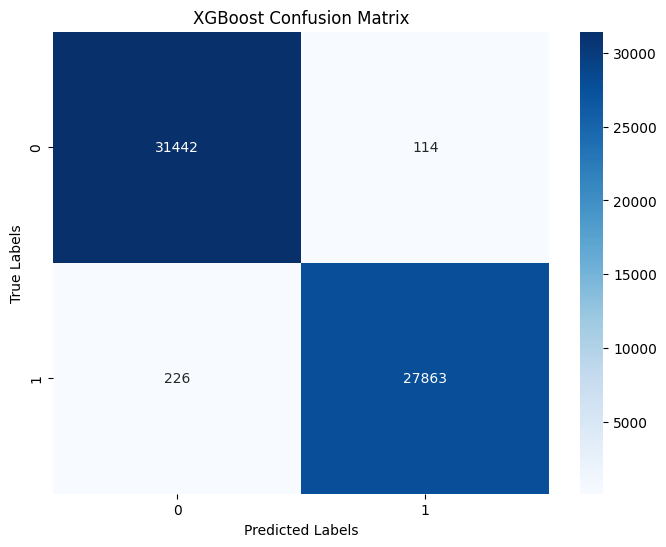

In [ ]:
!pip install xgboost
import xgboost as xgb

# Initialize and train an XGBoost classifier
xgb_classifier = xgb.XGBClassifier(objective='binary:logistic', random_state=42)
xgb_classifier.fit(X_train_final, y_train_final)

# Make predictions
y_pred_xgb = xgb_classifier.predict(X_test_final)

# Evaluate the model
accuracy_xgb = accuracy_score(y_test_final, y_pred_xgb)
print(f"XGBoost Accuracy: {accuracy_xgb}")
print(classification_report(y_test_final, y_pred_xgb))

# Confusion Matrix
cm_xgb = confusion_matrix(y_test_final, y_pred_xgb)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_xgb, annot=True, fmt='d', cmap='Blues',
            xticklabels=np.unique(y_test_final), yticklabels=np.unique(y_test_final))
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('XGBoost Confusion Matrix')
plt.show()

Logistic Regression

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression Accuracy: 0.9777852292731998
              precision    recall  f1-score   support

           0       0.97      0.99      0.98     31556
           1       0.99      0.96      0.98     28089

    accuracy                           0.98     59645
   macro avg       0.98      0.98      0.98     59645
weighted avg       0.98      0.98      0.98     59645



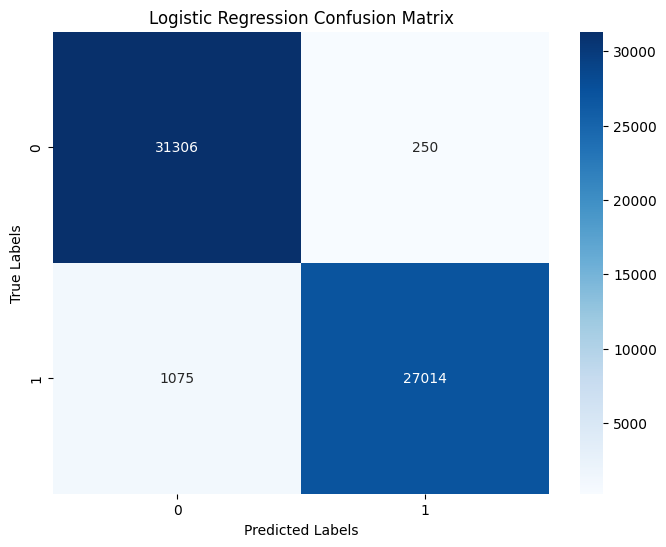

In [ ]:
from sklearn.linear_model import LogisticRegression

# Initialize and train a Logistic Regression classifier
logreg_classifier = LogisticRegression(random_state=42)
logreg_classifier.fit(X_train_final, y_train_final)

# Make predictions
y_pred_logreg = logreg_classifier.predict(X_test_final)

# Evaluate the model
accuracy_logreg = accuracy_score(y_test_final, y_pred_logreg)
print(f"Logistic Regression Accuracy: {accuracy_logreg}")
print(classification_report(y_test_final, y_pred_logreg))

# Confusion Matrix
cm_logreg = confusion_matrix(y_test_final, y_pred_logreg)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_logreg, annot=True, fmt='d', cmap='Blues',
            xticklabels=np.unique(y_test_final), yticklabels=np.unique(y_test_final))
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Logistic Regression Confusion Matrix')
plt.show()

SGDClassifier

SGD Classifier Accuracy: 0.9347137228602566
              precision    recall  f1-score   support

           0       0.98      0.89      0.94     31556
           1       0.89      0.98      0.93     28089

    accuracy                           0.93     59645
   macro avg       0.94      0.94      0.93     59645
weighted avg       0.94      0.93      0.93     59645



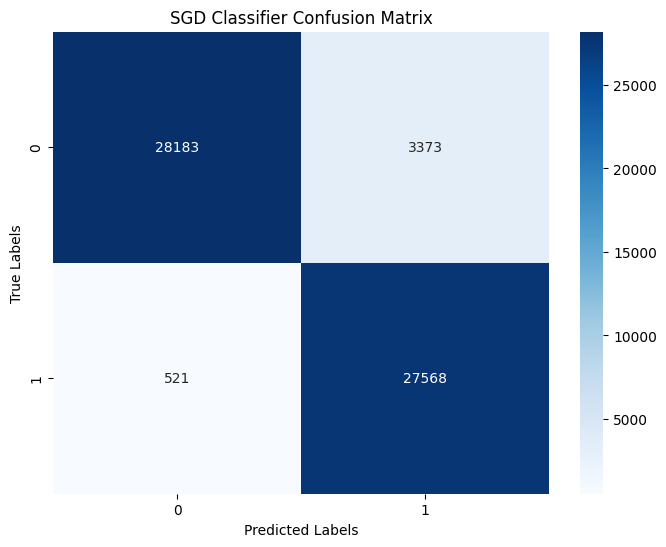

In [ ]:
from sklearn.linear_model import SGDClassifier

# Initialize and train an SGDClassifier
sgd_classifier = SGDClassifier(loss='hinge', penalty='l2', random_state=42)
sgd_classifier.fit(X_train_final, y_train_final)

# Make predictions
y_pred_sgd = sgd_classifier.predict(X_test_final)

# Evaluate the model
accuracy_sgd = accuracy_score(y_test_final, y_pred_sgd)
print(f"SGD Classifier Accuracy: {accuracy_sgd}")
print(classification_report(y_test_final, y_pred_sgd))

# Confusion Matrix
cm_sgd = confusion_matrix(y_test_final, y_pred_sgd)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_sgd, annot=True, fmt='d', cmap='Blues',
            xticklabels=np.unique(y_test_final), yticklabels=np.unique(y_test_final))
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('SGD Classifier Confusion Matrix')
plt.show()

AdaBoostClassifier

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


AdaBoost Accuracy: 0.9861849274876352
              precision    recall  f1-score   support

           0       0.98      0.99      0.99     31556
           1       0.99      0.98      0.99     28089

    accuracy                           0.99     59645
   macro avg       0.99      0.99      0.99     59645
weighted avg       0.99      0.99      0.99     59645



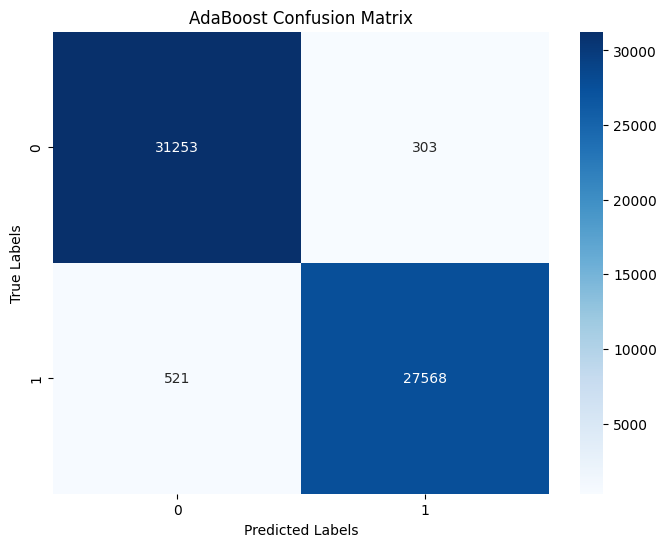

In [ ]:
from sklearn.ensemble import AdaBoostClassifier

# Initialize and train an AdaBoost classifier
ada_classifier = AdaBoostClassifier(n_estimators=100, random_state=42)
ada_classifier.fit(X_train_final, y_train_final)

# Make predictions
y_pred_ada = ada_classifier.predict(X_test_final)

# Evaluate the model
accuracy_ada = accuracy_score(y_test_final, y_pred_ada)
print(f"AdaBoost Accuracy: {accuracy_ada}")
print(classification_report(y_test_final, y_pred_ada))

# Confusion Matrix
cm_ada = confusion_matrix(y_test_final, y_pred_ada)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_ada, annot=True, fmt='d', cmap='Blues',
            xticklabels=np.unique(y_test_final), yticklabels=np.unique(y_test_final))
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('AdaBoost Confusion Matrix')
plt.show()

CatBoostClassifier

In [ ]:
!pip install catboost

CatBoost Accuracy: 0.9921032777265487
              precision    recall  f1-score   support

           0       0.99      1.00      0.99     31556
           1       0.99      0.99      0.99     28089

    accuracy                           0.99     59645
   macro avg       0.99      0.99      0.99     59645
weighted avg       0.99      0.99      0.99     59645



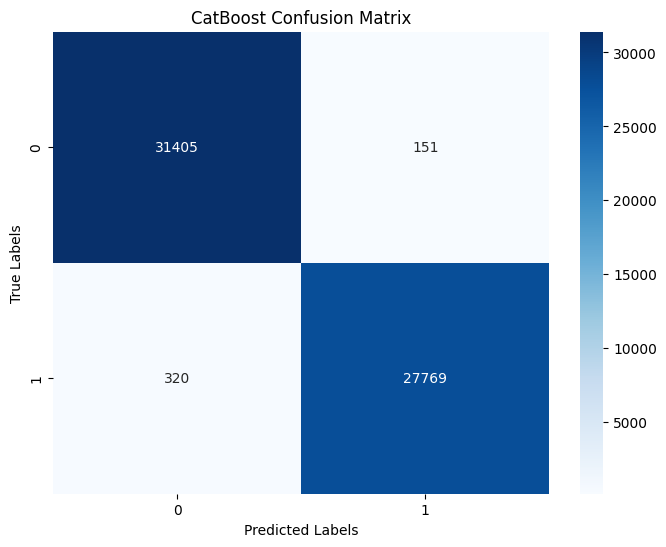

In [ ]:
from catboost import CatBoostClassifier
# Initialize and train a CatBoost classifier
catboost_classifier = CatBoostClassifier(iterations=100,
                                         learning_rate=0.1,
                                         depth=6,
                                         loss_function='Logloss',
                                         random_seed=42,
                                         verbose=0)

catboost_classifier.fit(X_train_final, y_train_final)

# Make predictions
y_pred_catboost = catboost_classifier.predict(X_test_final)

# Evaluate the model
accuracy_catboost = accuracy_score(y_test_final, y_pred_catboost)
print(f"CatBoost Accuracy: {accuracy_catboost}")
print(classification_report(y_test_final, y_pred_catboost))

# Confusion Matrix
cm_catboost = confusion_matrix(y_test_final, y_pred_catboost)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_catboost, annot=True, fmt='d', cmap='Blues',
            xticklabels=np.unique(y_test_final), yticklabels=np.unique(y_test_final))
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('CatBoost Confusion Matrix')
plt.show()

GradientBoostingClassifier

Gradient Boosting Accuracy: 0.9896219297510269
              precision    recall  f1-score   support

           0       0.99      0.99      0.99     31556
           1       0.99      0.98      0.99     28089

    accuracy                           0.99     59645
   macro avg       0.99      0.99      0.99     59645
weighted avg       0.99      0.99      0.99     59645



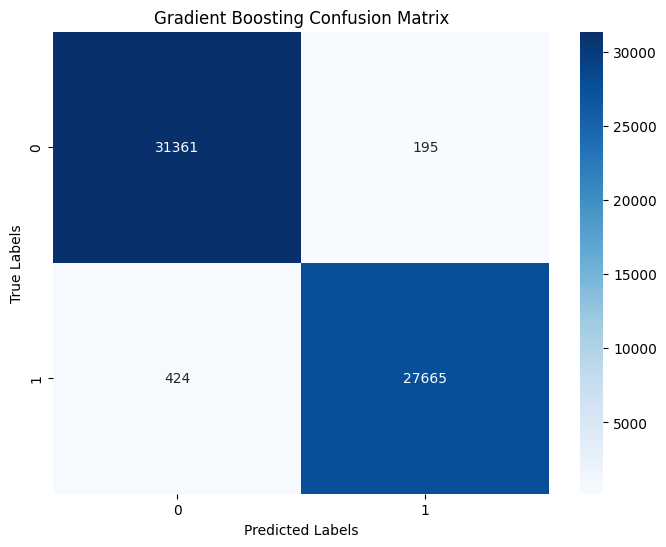

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

# Initialize and train a Gradient Boosting classifier
gb_classifier = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
gb_classifier.fit(X_train_final, y_train_final)

# Make predictions
y_pred_gb = gb_classifier.predict(X_test_final)

# Evaluate the model
accuracy_gb = accuracy_score(y_test_final, y_pred_gb)
print(f"Gradient Boosting Accuracy: {accuracy_gb}")
print(classification_report(y_test_final, y_pred_gb))

# Confusion Matrix
cm_gb = confusion_matrix(y_test_final, y_pred_gb)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_gb, annot=True, fmt='d', cmap='Blues',
            xticklabels=np.unique(y_test_final), yticklabels=np.unique(y_test_final))
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Gradient Boosting Confusion Matrix')
plt.show()

KNeighborsClassifier

k-NN Accuracy: 0.9847933607175791
              precision    recall  f1-score   support

           0       0.98      0.99      0.99     31556
           1       0.99      0.98      0.98     28089

    accuracy                           0.98     59645
   macro avg       0.98      0.98      0.98     59645
weighted avg       0.98      0.98      0.98     59645



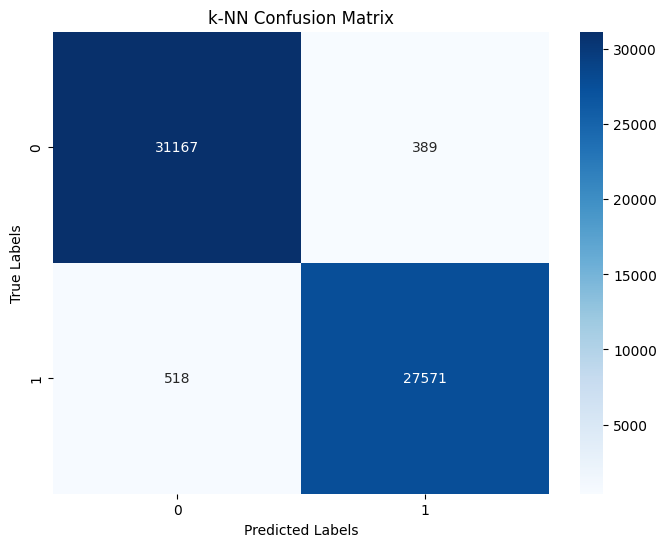

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

# Initialize and train a k-NN classifier
knn_classifier = KNeighborsClassifier(n_neighbors=5)
knn_classifier.fit(X_train_final, y_train_final)

# Make predictions
y_pred_knn = knn_classifier.predict(X_test_final)

# Evaluate the model
accuracy_knn = accuracy_score(y_test_final, y_pred_knn)
print(f"k-NN Accuracy: {accuracy_knn}")
print(classification_report(y_test_final, y_pred_knn))

# Confusion Matrix
cm_knn = confusion_matrix(y_test_final, y_pred_knn)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_knn, annot=True, fmt='d', cmap='Blues',
            xticklabels=np.unique(y_test_final), yticklabels=np.unique(y_test_final))
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('k-NN Confusion Matrix')
plt.show()

BaggingClassifier

Bagging Accuracy: 0.9939475228434906
              precision    recall  f1-score   support

           0       0.99      1.00      0.99     31556
           1       1.00      0.99      0.99     28089

    accuracy                           0.99     59645
   macro avg       0.99      0.99      0.99     59645
weighted avg       0.99      0.99      0.99     59645



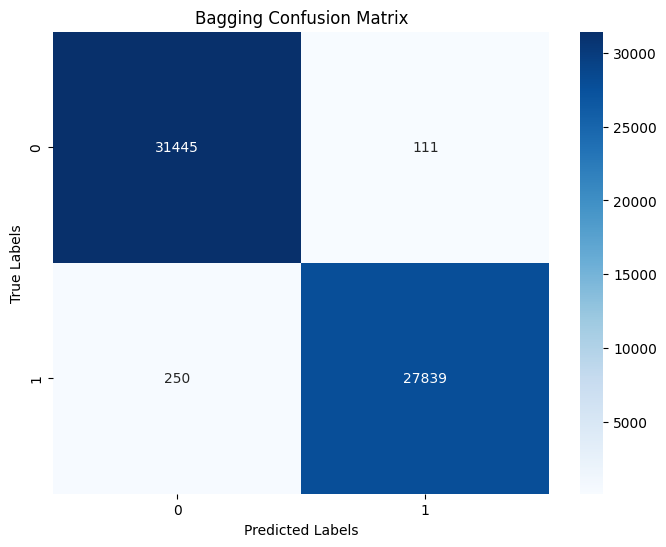

In [ ]:
from sklearn.ensemble import BaggingClassifier

base_estimator = RandomForestClassifier(random_state=42)

# Initialize the Bagging classifier
bagging_classifier = BaggingClassifier(estimator=base_estimator, n_estimators=10, random_state=42)

# Train the Bagging classifier
bagging_classifier.fit(X_train_final, y_train_final)

# Make predictions
y_pred_bagging = bagging_classifier.predict(X_test_final)

# Evaluate the model
accuracy_bagging = accuracy_score(y_test_final, y_pred_bagging)
print(f"Bagging Accuracy: {accuracy_bagging}")
print(classification_report(y_test_final, y_pred_bagging))

# Confusion Matrix
cm_bagging = confusion_matrix(y_test_final, y_pred_bagging)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_bagging, annot=True, fmt='d', cmap='Blues',
            xticklabels=np.unique(y_test_final), yticklabels=np.unique(y_test_final))
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Bagging Confusion Matrix')
plt.show()

StackingClassifier

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

Stacking Classifier Accuracy: 0.9947858160784643
              precision    recall  f1-score   support

           0       0.99      1.00      1.00     31556
           1       1.00      0.99      0.99     28089

    accuracy                           0.99     59645
   macro avg       0.99      0.99      0.99     59645
weighted avg       0.99      0.99      0.99     59645



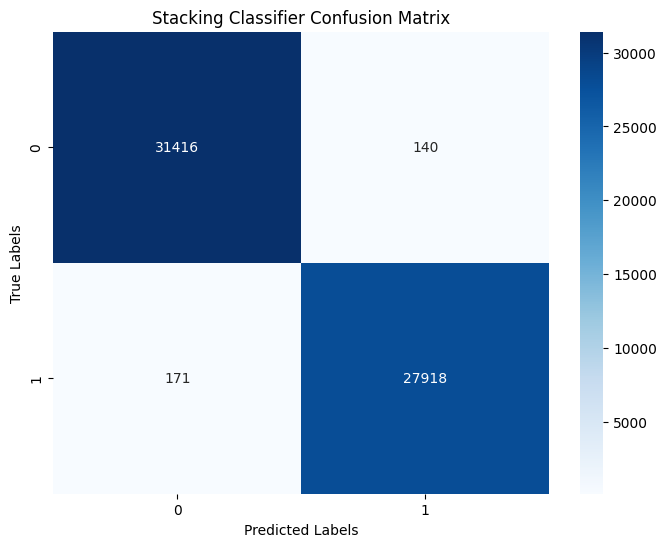

In [ ]:
from sklearn.ensemble import StackingClassifier

# Define the base estimators
estimators = [
    ('rf', rf_classifier_final),
    ('xgb', xgb_classifier),
    ('logreg', logreg_classifier),
]


final_estimator = LogisticRegression()

# Create the stacking classifier
stacking_classifier = StackingClassifier(estimators=estimators, final_estimator=final_estimator)

# Train the stacking classifier
stacking_classifier.fit(X_train_final, y_train_final)

# Make predictions
y_pred_stacking = stacking_classifier.predict(X_test_final)

# Evaluate the model
accuracy_stacking = accuracy_score(y_test_final, y_pred_stacking)
print(f"Stacking Classifier Accuracy: {accuracy_stacking}")
print(classification_report(y_test_final, y_pred_stacking))

# Confusion Matrix
cm_stacking = confusion_matrix(y_test_final, y_pred_stacking)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_stacking, annot=True, fmt='d', cmap='Blues',
            xticklabels=np.unique(y_test_final), yticklabels=np.unique(y_test_final))
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Stacking Classifier Confusion Matrix')
plt.show()

Perceptron

Perceptron Accuracy: 0.8574063207309917
              precision    recall  f1-score   support

           0       0.99      0.74      0.85     31556
           1       0.77      0.99      0.87     28089

    accuracy                           0.86     59645
   macro avg       0.88      0.86      0.86     59645
weighted avg       0.89      0.86      0.86     59645



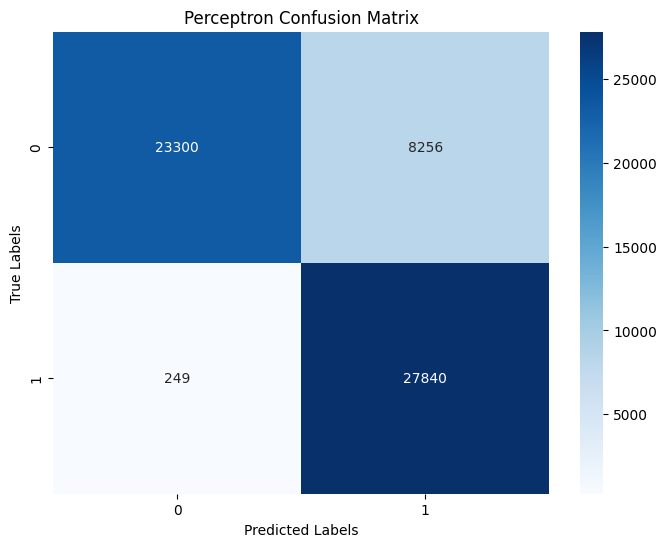

In [ ]:
from sklearn.linear_model import Perceptron

# Initialize and train a Perceptron classifier
perceptron_classifier = Perceptron(random_state=42)
perceptron_classifier.fit(X_train_final, y_train_final)

# Make predictions
y_pred_perceptron = perceptron_classifier.predict(X_test_final)

# Evaluate the model
accuracy_perceptron = accuracy_score(y_test_final, y_pred_perceptron)
print(f"Perceptron Accuracy: {accuracy_perceptron}")
print(classification_report(y_test_final, y_pred_perceptron))

# Confusion Matrix
cm_perceptron = confusion_matrix(y_test_final, y_pred_perceptron)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_perceptron, annot=True, fmt='d', cmap='Blues',
            xticklabels=np.unique(y_test_final), yticklabels=np.unique(y_test_final))
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Perceptron Confusion Matrix')
plt.show()

MDI Feature Importance

                       Feature  Importance
24             NoOfExternalRef    0.143450
23                  LineOfCode    0.138925
22                   NoOfImage    0.116155
20                 NoOfSelfRef    0.105417
16                      NoOfJS    0.084400
0                 HasSocialNet    0.042149
42                     NoOfCSS    0.038082
2               HasDescription    0.033885
6                 IsResponsive    0.024174
7           URLTitleMatchScore    0.023382
50           LargestLineLength    0.022049
31                 TitleLength    0.020342
4        DomainTitleMatchScore    0.019596
3                      IsHTTPS    0.015912
19  NoOfOtherSpecialCharsInURL    0.015788
5              HasSubmitButton    0.015588
1             HasCopyrightInfo    0.015382
12                    HasTitle    0.013993
17            LetterRatioInURL    0.011658
29             NoOfDegitsInURL    0.010399
25            NoOfLettersInURL    0.010297
13             DegitRatioInURL    0.009925
26         

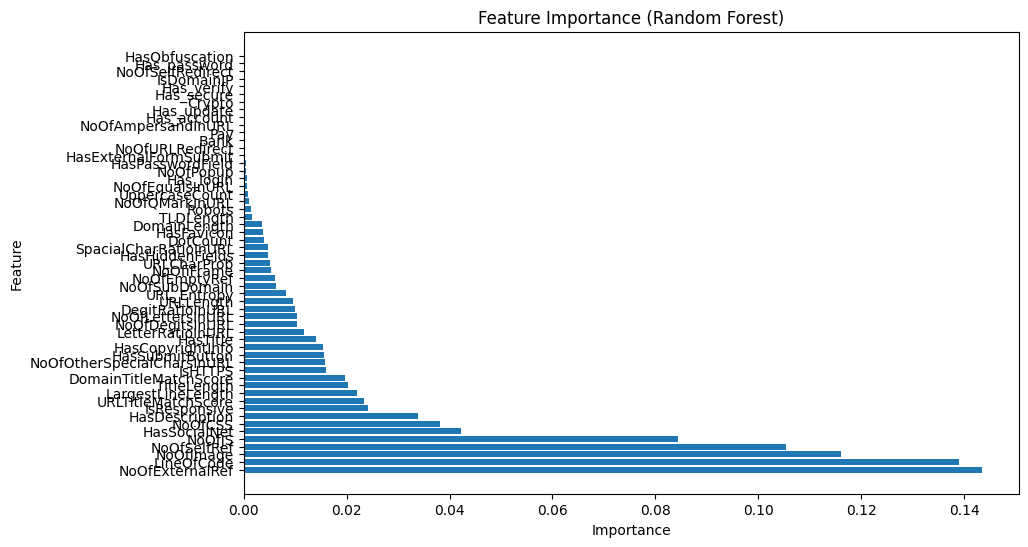

In [ ]:
# MDI feature importances from the trained RandomForestClassifier
importances = rf_classifier_final.feature_importances_

# Create a DataFrame for visualization
feature_importances = pd.DataFrame({'Feature': X_train_final.columns, 'Importance': importances})

# Sort the DataFrame by importance
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)

# Print or visualize the feature importances
print(feature_importances)


plt.figure(figsize=(10, 6))
plt.barh(feature_importances['Feature'], feature_importances['Importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance (Random Forest)')
plt.show()

Convolutional Neural Network

Epoch 1/100
5965/5965 ━━━━━━━━━━━━━━━━━━━━ 60s 9ms/step - accuracy: 0.9467 - loss: 6.0004 - val_accuracy: 0.9758 - val_loss: 0.0825
Epoch 2/100
5965/5965 ━━━━━━━━━━━━━━━━━━━━ 52s 9ms/step - accuracy: 0.9719 - loss: 0.0936 - val_accuracy: 0.9668 - val_loss: 0.1121
Epoch 3/100
5965/5965 ━━━━━━━━━━━━━━━━━━━━ 70s 7ms/step - accuracy: 0.9712 - loss: 0.0937 - val_accuracy: 0.9788 - val_loss: 0.0719
Epoch 4/100
5965/5965 ━━━━━━━━━━━━━━━━━━━━ 41s 7ms/step - accuracy: 0.9769 - loss: 0.0734 - val_accuracy: 0.9781 - val_loss: 0.0663
Epoch 5/100
5965/5965 ━━━━━━━━━━━━━━━━━━━━ 39s 7ms/step - accuracy: 0.9770 - loss: 0.0781 - val_accuracy: 0.9767 - val_loss: 0.0771
Epoch 6/100
5965/5965 ━━━━━━━━━━━━━━━━━━━━ 49s 8ms/step - accuracy: 0.9768 - loss: 0.0726 - val_accuracy: 0.9076 - val_loss: 0.2254
Epoch 7/100
5965/5965 ━━━━━━━━━━━━━━━━━━━━ 41s 7ms/step - accuracy: 0.9729 - loss: 0.0856 - val_accuracy: 0.9783 - val_loss: 0.0680
Epoch 8/100
5965/5965 ━━━━━━━━━━━━━━━━━━━━ 42s 7ms/step - accuracy: 0.9665 -

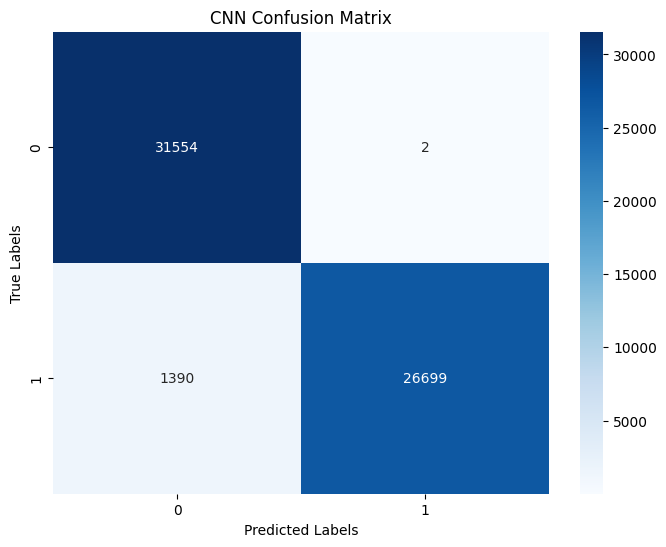

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential(
    [
        keras.Input(shape=(X_train_final.shape[1], 1)),
        layers.Conv1D(32, 3, activation="relu"),
        layers.MaxPooling1D(pool_size=2),
        layers.Conv1D(64, 3, activation="relu"),
        layers.MaxPooling1D(pool_size=2),
        layers.Flatten(),
        layers.Dense(10, activation="relu"),
        layers.Dense(1, activation="sigmoid"),
    ]
)

# Compile the model
model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

# Train the model
model.fit(
    X_train_final.values.reshape(X_train_final.shape[0], X_train_final.shape[1], 1),
    y_train_final,
    epochs=100,
    batch_size=32,
    validation_split=0.2
)

# Evaluate the model
loss, accuracy = model.evaluate(X_test_final.values.reshape(X_test_final.shape[0], X_test_final.shape[1], 1), y_test_final, verbose=0)
print(f"CNN Accuracy: {accuracy}")

# Make predictions (probabilities)
y_pred_cnn_prob = model.predict(X_test_final.values.reshape(X_test_final.shape[0], X_test_final.shape[1], 1))

# Convert probabilities to class labels (0 or 1)
y_pred_cnn = (y_pred_cnn_prob > 0.5).astype(int)

# Confusion Matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm_cnn = confusion_matrix(y_test_final, y_pred_cnn)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_cnn, annot=True, fmt='d', cmap='Blues',
            xticklabels=np.unique(y_test_final), yticklabels=np.unique(y_test_final))
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('CNN Confusion Matrix')
plt.show()

Cross-validation Score

In [ ]:
from sklearn.model_selection import cross_val_score

# Example using RandomForestClassifier (replace with your desired model)
rf_classifier_cv = RandomForestClassifier(n_estimators=100, random_state=42)

# Perform 5-fold cross-validation
cv_scores = cross_val_score(rf_classifier_cv, X_final, y_final, cv=5)

# Print the cross-validation scores
print("Cross-Validation Scores:", cv_scores)
print("Average Cross-Validation Score:", np.mean(cv_scores))

Cross-Validation Scores: [0.89574985 0.92846006 0.99968145 0.99981558 0.9998994 ]
Average Cross-Validation Score: 0.9647212674993713


Grid Search

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# Define the parameter grid for RandomForestClassifier
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10]
}

# Initialize the GridSearchCV object
grid_search = GridSearchCV(estimator=RandomForestClassifier(random_state=42),
                           param_grid=param_grid,
                           cv=5,  # 5-fold cross-validation
                           scoring='accuracy',
                           n_jobs=-1)

# Fit the grid search to the data
grid_search.fit(X_train_final, y_train_final)

# Print the best hyperparameters and the corresponding score
print("Best Hyperparameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)

# Get the best model
best_rf_classifier = grid_search.best_estimator_

# Evaluate the best model on the test set
y_pred_best = best_rf_classifier.predict(X_test_final)
accuracy_best = accuracy_score(y_test_final, y_pred_best)
print(f"Accuracy of Best Model: {accuracy_best}")

Best Hyperparameters: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 200}
Best Score: 0.9942702657389555
Accuracy of Best Model: 0.994634923296169


Optuna

In [ ]:
!pip install optuna

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 364.4/364.4 kB 7.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.5/233.5 kB 18.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.6/78.6 kB 6.5 MB/s eta 0:00:00


In [ ]:
import optuna
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


def objective(trial):
    n_estimators = trial.suggest_int("n_estimators", 50, 200)
    max_depth = trial.suggest_int("max_depth", 10, 100)
    min_samples_split = trial.suggest_int("min_samples_split", 2, 10)

    # Create and train the model with the suggested hyperparameters
    rf_classifier = RandomForestClassifier(
        n_estimators=n_estimators, max_depth=max_depth, min_samples_split=min_samples_split, random_state=42
    )
    rf_classifier.fit(X_train_final, y_train_final)

    # Make predictions and calculate the accuracy
    y_pred = rf_classifier.predict(X_test_final)
    accuracy = accuracy_score(y_test_final, y_pred)
    return accuracy


# Create a study object and optimize the objective function
study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=100)

# Print the best hyperparameters and accuracy
print("Best Hyperparameters:", study.best_params)
print("Best Accuracy:", study.best_value)

# Train the model with the best hyperparameters
best_rf_classifier = RandomForestClassifier(**study.best_params, random_state=42)
best_rf_classifier.fit(X_train_final, y_train_final)

# Evaluate the best model
y_pred_best = best_rf_classifier.predict(X_test_final)
accuracy_best = accuracy_score(y_test_final, y_pred_best)
print(f"Accuracy of Best Model (Optuna): {accuracy_best}")

print(classification_report(y_test_final, y_pred_best))

# Confusion Matrix for the best model
cm_best = confusion_matrix(y_test_final, y_pred_best)


[I 2024-12-02 13:13:42,823] A new study created in memory with name: no-name-f830a458-12ce-4059-8e3c-59864a47c1e8
[I 2024-12-02 13:14:28,076] Trial 0 finished with value: 0.9941822449492833 and parameters: {'n_estimators': 56, 'max_depth': 32, 'min_samples_split': 5}. Best is trial 0 with value: 0.9941822449492833.
[I 2024-12-02 13:15:26,123] Trial 1 finished with value: 0.9945007963785732 and parameters: {'n_estimators': 112, 'max_depth': 64, 'min_samples_split': 3}. Best is trial 1 with value: 0.9945007963785732.
[I 2024-12-02 13:16:55,694] Trial 2 finished with value: 0.9944840305138738 and parameters: {'n_estimators': 172, 'max_depth': 69, 'min_samples_split': 3}. Best is trial 1 with value: 0.9945007963785732.
[I 2024-12-02 13:17:35,095] Trial 3 finished with value: 0.9943666694609774 and parameters: {'n_estimators': 76, 'max_depth': 61, 'min_samples_split': 5}. Best is trial 1 with value: 0.9945007963785732.
[I 2024-12-02 13:18:38,779] Trial 4 finished with value: 0.9945007963785

Best Hyperparameters: {'n_estimators': 156, 'max_depth': 74, 'min_samples_split': 2}
Best Accuracy: 0.9947858160784643
Accuracy of Best Model (Optuna): 0.9947858160784643
              precision    recall  f1-score   support

           0       0.99      1.00      1.00     31556
           1       1.00      0.99      0.99     28089

    accuracy                           0.99     59645
   macro avg       0.99      0.99      0.99     59645
weighted avg       0.99      0.99      0.99     59645



NameError: name 'plt' is not defined

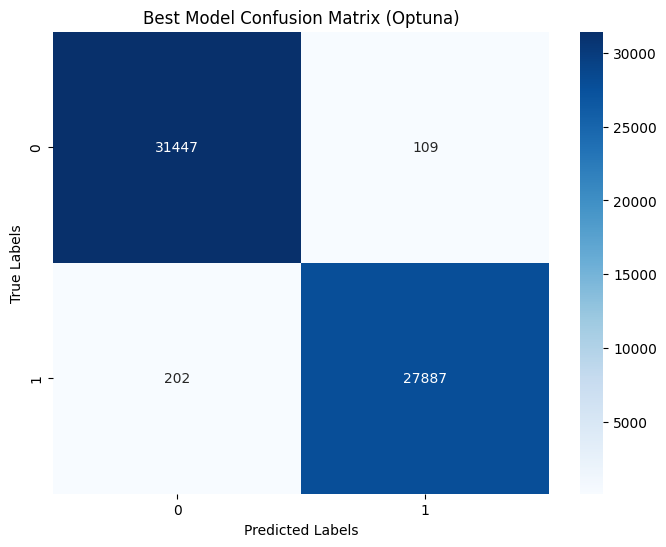

In [ ]:
import seaborn as sns
plt.figure(figsize=(8, 6))
sns.heatmap(cm_best, annot=True, fmt='d', cmap='Blues',
            xticklabels=np.unique(y_test_final), yticklabels=np.unique(y_test_final))
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Best Model Confusion Matrix (Optuna)')
plt.show()

                  Feature  Importance
23             LineOfCode    0.142774
24        NoOfExternalRef    0.134064
20            NoOfSelfRef    0.110007
22              NoOfImage    0.109059
16                 NoOfJS    0.097708
0            HasSocialNet    0.052053
42                NoOfCSS    0.041705
2          HasDescription    0.029625
4   DomainTitleMatchScore    0.023608
6            IsResponsive    0.022848


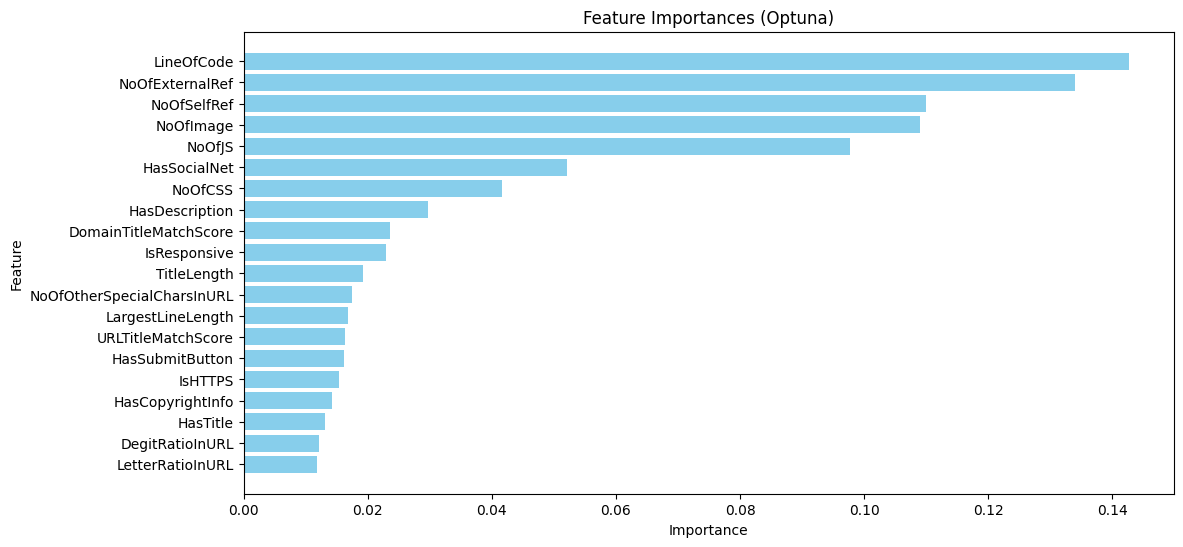

In [ ]:
feature_importances = best_rf_classifier.feature_importances_
feature_importance_df = pd.DataFrame({'Feature': X_final.columns, 'Importance': feature_importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Display the top 10 features
print(feature_importance_df.head(10))
plt.figure(figsize=(12, 6))
plt.barh(feature_importance_df['Feature'][:20], feature_importance_df['Importance'][:20], color='skyblue') # Top 20
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.title("Feature Importances (Optuna)")
plt.gca().invert_yaxis()
plt.show()

In [ ]:
from sklearn.inspection import permutation_importance
import time
start_time = time.time()
result = permutation_importance(
    best_rf_classifier, X_test_final, y_test_final, n_repeats=10, random_state=42, n_jobs=2
)


In [ ]:
elapsed_time = time.time() - start_time
print(f"Elapsed time to compute the importances: {elapsed_time:.3f} seconds")


Elapsed time to compute the importances: 678.662 seconds


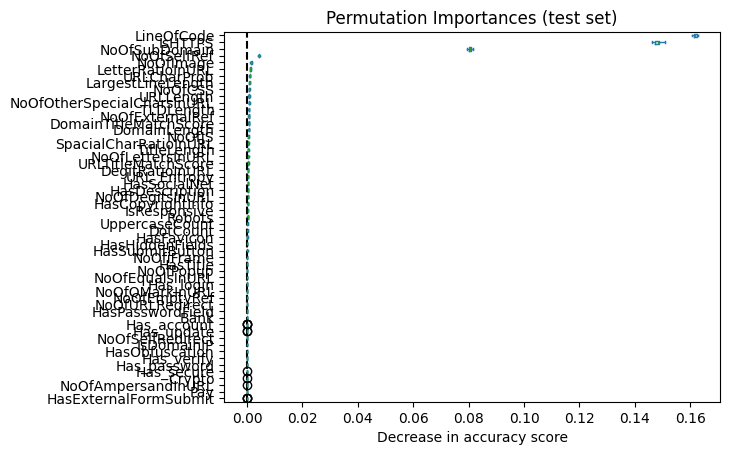

In [ ]:

sorted_importances_idx = result.importances_mean.argsort()
importances = pd.DataFrame(
    result.importances[sorted_importances_idx].T,
    columns=X_test_final.columns[sorted_importances_idx],
)
ax = importances.plot.box(vert=False, whis=10)
ax.set_title("Permutation Importances (test set)")
ax.axvline(x=0, color="k", linestyle="--")
ax.set_xlabel("Decrease in accuracy score")
plt.show()

Permutation Feature Importance

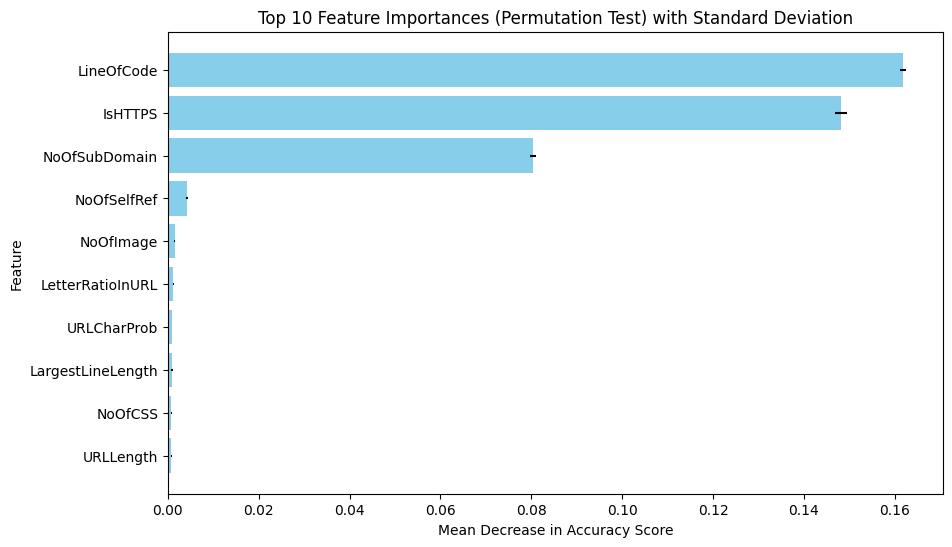

In [ ]:

importance_summary = pd.DataFrame({
    'Mean Importance': result.importances_mean[sorted_importances_idx],
    'Std Dev Importance': result.importances_std[sorted_importances_idx]
}, index=X_test_final.columns[sorted_importances_idx])

# Step 2: Select top 10 features
top_10_features = importance_summary.tail(10)

# Step 3: Plot bar plot with error bars
plt.figure(figsize=(10, 6))
plt.barh(
    top_10_features.index,
    top_10_features['Mean Importance'],
    xerr=top_10_features['Std Dev Importance'],
    color='skyblue'
)
plt.title("Top 10 Feature Importances (Permutation Test) with Standard Deviation")
plt.xlabel("Mean Decrease in Accuracy Score")
plt.ylabel("Feature")
plt.show()


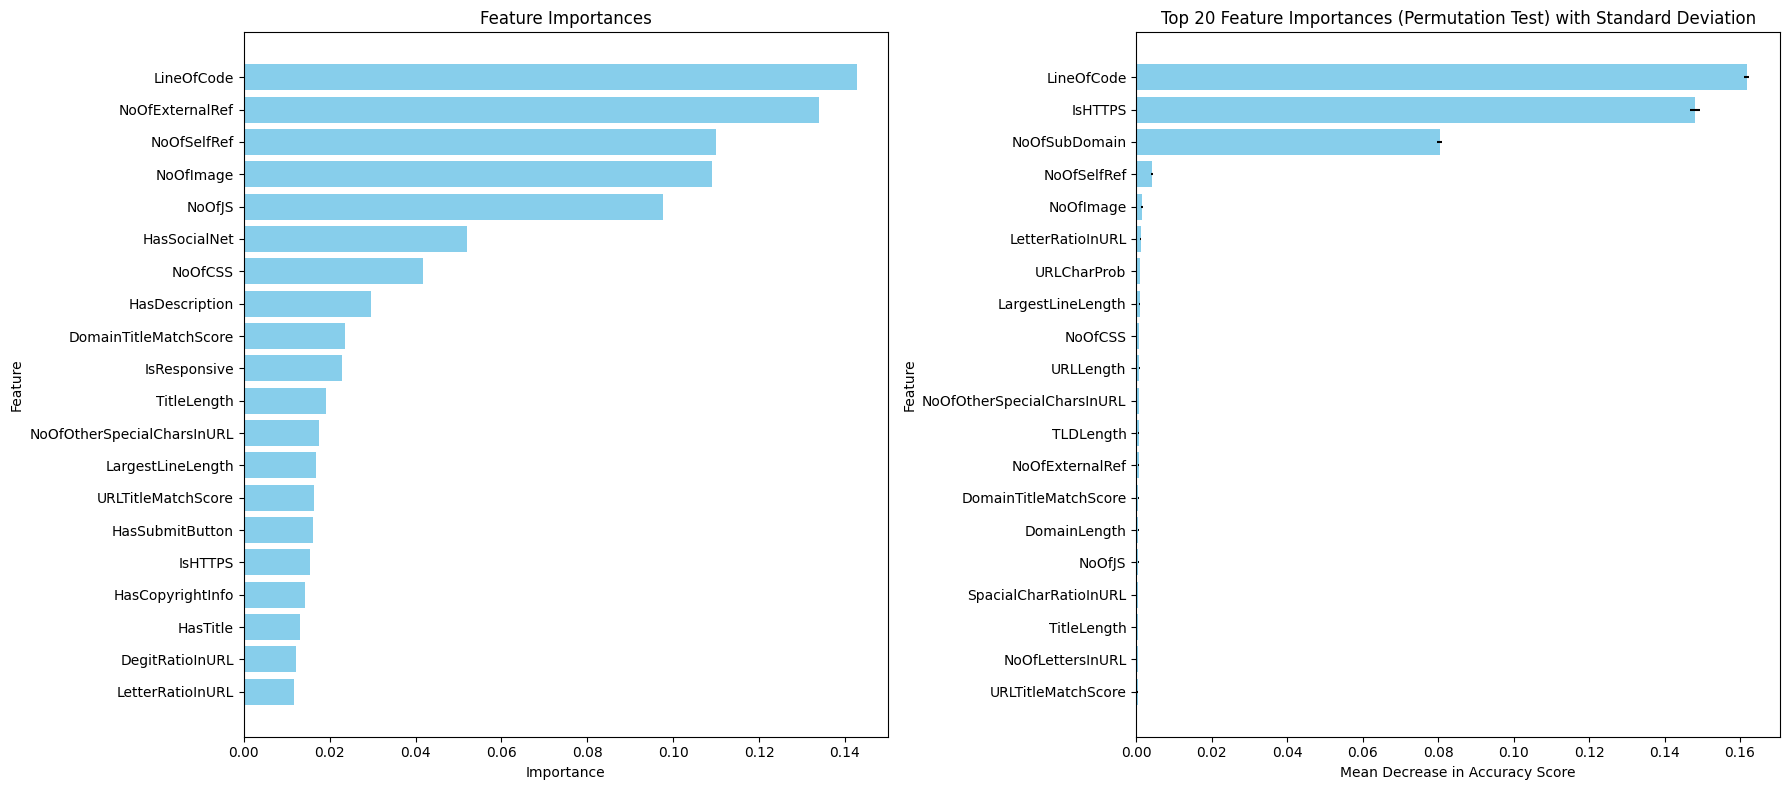

In [ ]:
top_20_importances = pd.DataFrame({
    'Mean Importance': result.importances_mean[sorted_importances_idx[-20:]],
    'Std Dev Importance': result.importances_std[sorted_importances_idx[-20:]]
}, index=X_test_final.columns[sorted_importances_idx[-20:]])

fig, axes = plt.subplots(1, 2, figsize=(18, 8))
# Create DataFrame from permutation importance results
permutation_importance_df = pd.DataFrame({
    'Feature': X_test_final.columns,
    'Mean Importance': result.importances_mean,
    'Std Dev Importance': result.importances_std
})
permutation_importance_df = permutation_importance_df.sort_values(by='Mean Importance', ascending=False)

axes[0].barh(
    feature_importance_df['Feature'][:20],
    feature_importance_df['Importance'][:20],
    color='skyblue'
)  # Top 20 features
axes[0].set_xlabel("Importance")
axes[0].set_ylabel("Feature")
axes[0].set_title("Feature Importances")
axes[0].invert_yaxis()
axes[1].barh(
    top_20_importances.index,
    top_20_importances['Mean Importance'],
    xerr=top_20_importances['Std Dev Importance'],
    color='skyblue'
)
axes[1].set_title("Top 20 Feature Importances (Permutation Test) with Standard Deviation")
axes[1].set_xlabel("Mean Decrease in Accuracy Score")
axes[1].set_ylabel("Feature")
plt.tight_layout()
plt.show()


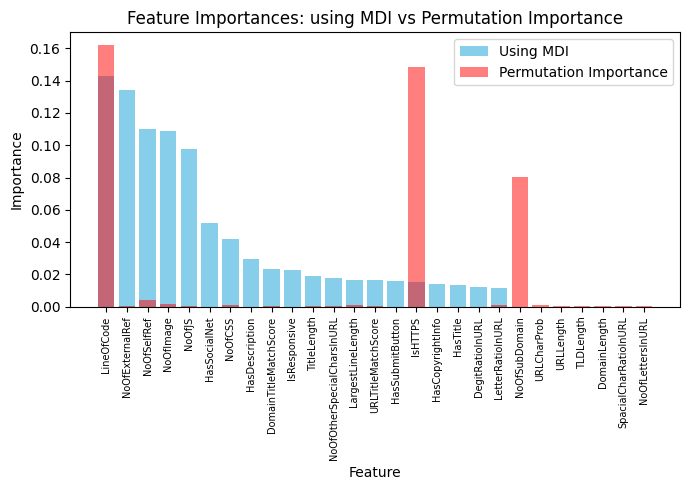

In [ ]:

plt.figure(figsize=(7, 5))

# Plot RandomForest feature importances
plt.bar(feature_importance_df['Feature'][:20], feature_importance_df['Importance'][:20], color='skyblue', label='Using MDI')

# Plot Permutation Importance on top of the RandomForest importances
plt.bar(permutation_importance_df['Feature'][:20], permutation_importance_df['Importance'][:20], color='red', alpha=0.5, label='Permutation Importance')

# Labels and Title
plt.xlabel("Feature")
plt.ylabel("Importance")
plt.title("Feature Importances: using MDI vs Permutation Importance")
plt.xticks(rotation=90, fontsize=7)  # Rotate x-axis labels for better readability
plt.legend()
plt.tight_layout()  # Adjust layout for better spacing

plt.show()



In [ ]:
print("Top 10 Feature Importances from RandomForestClassifier:")
print(feature_importance_df.head(20))

print("Top 10 Feature Importances from Permutation Importance:")
print(permutation_importance_df.head(20))

Top 10 Feature Importances from RandomForestClassifier:
                       Feature  Importance
23                  LineOfCode    0.142774
24             NoOfExternalRef    0.134064
20                 NoOfSelfRef    0.110007
22                   NoOfImage    0.109059
16                      NoOfJS    0.097708
0                 HasSocialNet    0.052053
42                     NoOfCSS    0.041705
2               HasDescription    0.029625
4        DomainTitleMatchScore    0.023608
6                 IsResponsive    0.022848
31                 TitleLength    0.019229
19  NoOfOtherSpecialCharsInURL    0.017520
50           LargestLineLength    0.016787
7           URLTitleMatchScore    0.016294
5              HasSubmitButton    0.016160
3                      IsHTTPS    0.015353
1             HasCopyrightInfo    0.014164
12                    HasTitle    0.013145
13             DegitRatioInURL    0.012167
17            LetterRatioInURL    0.011745
Top 10 Feature Importances from Permutati